# Machine Learning Algorithms

### The Algorithm Cheat Sheet

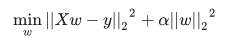

### 1.	Generalized Linear Models
Linear model specifies the (linear) relationship between a dependent (or response) variable Y, and a set of predictor variables Xs


#### OLS
- Ordinary Least Squares is typical linear regression 

First we will load Boston housing price dataset

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


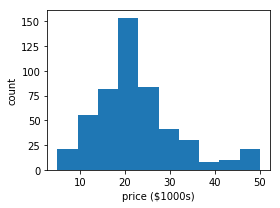

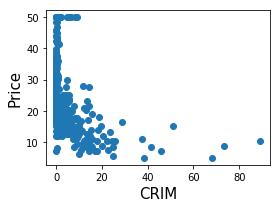

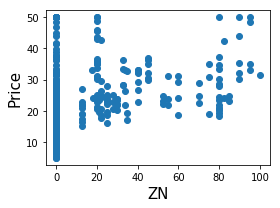

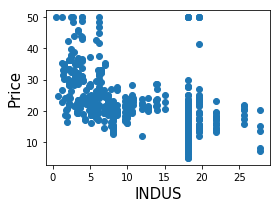

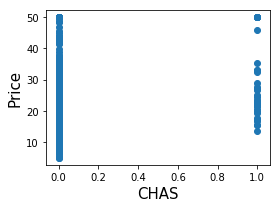

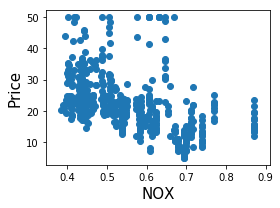

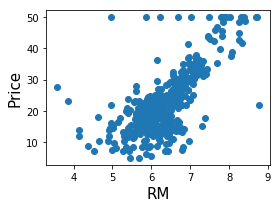

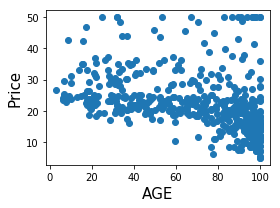

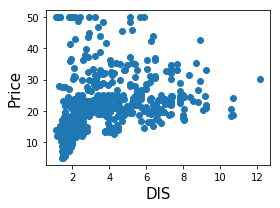

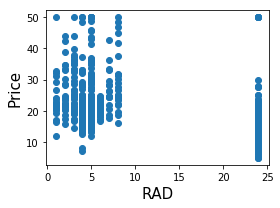

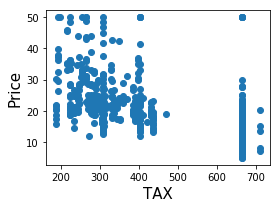

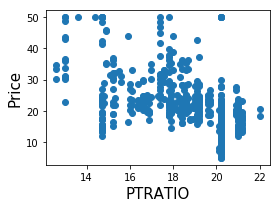

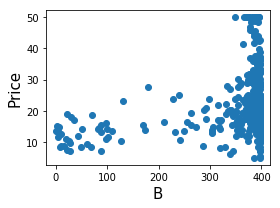

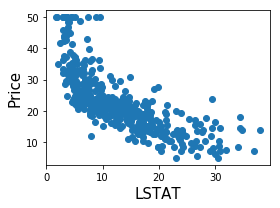

In [34]:
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt

data = load_boston()
print (data.feature_names)

plt.figure(figsize=(4, 3))
plt.hist(data.target)
plt.xlabel('price ($1000s)')
plt.ylabel('count')
plt.tight_layout()

for index, feature_name in enumerate(data.feature_names):
    plt.figure(figsize=(4, 3))
    plt.scatter(data.data[:, index], data.target)
    plt.ylabel('Price', size=15)
    plt.xlabel(feature_name, size=15)
    plt.tight_layout()

Text(0,0.5,'Predicted price ($1000s)')

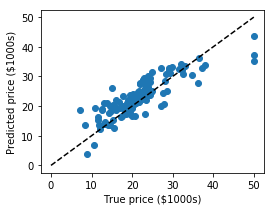

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target)

# print (data.data)

clf = LinearRegression()
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
expected = y_test

plt.figure(figsize=(4, 3))
plt.scatter(expected, predicted)
plt.plot([0, 50], [0, 50], '--k')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')


#### Ridge Regression 
- Imposing a penalty on the size of coefficients which minimize a penalized residual sum of squares. Larger the value of penalizer, the greater the amount of shrinkage and the coefficients become more robust to collinearity of features. L2 regularized (penalty impacts by square of coefficient; use cross val to optimize) Variant HuberRegressor is different to Ridge because it applies a linear loss to samples that are classified as outliers.

![image.png](attachment:image.png)

- As Alpha, regularizer, is smaller and smaller, the coefficients blow out of proportion. Can use RidgeCV for  built-in cross-validation of the alpha parameter using GridSearchCV.

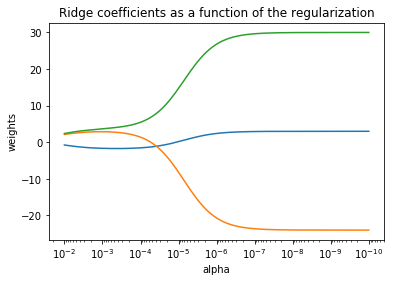

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

# X is the nxn Hilbert matrix
n = 3  # size of matrix
X = 1. / (np.arange(1, n+1) + np.arange(0, n)[:, np.newaxis])
y = np.ones(n)

# Compute a range of log alphas  
n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)   

coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)
    
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.show()

#### Lasso Regression 
- Simultaneously identifies and estimates the most important coefficients by assuming only few variables actually matter (betting on sparsity).
- Effectively reduces the number of variables upon which the given solution is dependent (e.g. in compressed sensing)
- Employs a L1 regularization method

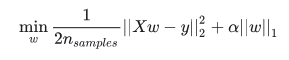


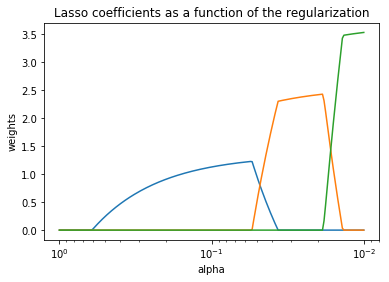

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

# X is the nxn Hilbert matrix
n = 3  # size of matrix
X = 1. / (np.arange(1, n+1) + np.arange(0, n)[:, np.newaxis])
y = np.ones(n)

# Compute a range of log alphas  
n_alphas = 200
alphas = np.logspace(-2, 0, n_alphas)   

coefs = []
for a in alphas:
    lasso = linear_model.Lasso(alpha=a, fit_intercept=False)
    lasso.fit(X, y)
    coefs.append(lasso.coef_)
    
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization')
plt.show()